#### Before you run this notebook, execute the cell below to add html styling!

In [8]:
%%html
<style>
.header1 {
  padding: 10px;
  text-align: center;
  background: #1abc9c;
  color: white;
    width: 90%;
}
.content1 {
    padding:10px;
    text-align: justify;
    background: #afd5cd;
    width: 90%;
}
</style>
<style>
.title {
  padding: 10px;
  text-align: center;
  background: #1abc9c;
  color: white;
    width: 90%;
</style>

# <div class="title">Predictions and Machine Learning</div>

<center><img src="https://github.com/jeshan49/EEMP2019/raw/master/content/part-5/part-5-1/ml.png" width="500"></center>

---
<center><span style="font-size:larger;">Prof. Dr. Dirk Sliwka, Lea Petters & Jesper Armouti-Hansen</span></center>
<center><span style="font-size:larger;">University of Cologne (2019/20)</span></center>

### How to run this notebook

- Click on the link on the course page:
    - Here you can view the notebook as an html file
    - Alternatively, click "Download" in the upper right corner, right click on the output and save the notebook as an .ipynb file
    - Then execute the following code to check whether you have all required packages installed:

In [35]:
#code that checks whether the required packages are installed
import subprocess
import sys

reqs = subprocess.check_output([sys.executable, '-m', 'pip', 'freeze'])
installed_packages = [r.decode().split('==')[0] for r in reqs.split()]
critical_packages = ['numpy', 'pandas', 'statsmodels', 'matplotlib', 'scikit-learn', 'seaborn']
nice_packages = ['ipywidgets']

for p in critical_packages:
    if p not in installed_packages:
        print('the critical package ', p, 'is not installed. Please install it.')
    else:
        print(p, 'is installed.')
for p in nice_packages:
    if p not in installed_packages:
        print('the less important package ', p, 'is not installed. Please install it if you want to be able to execute all the code.')
    else:
        print(p, 'is installed.')

numpy is installed.
pandas is installed.
statsmodels is installed.
matplotlib is installed.
scikit-learn is installed.
seaborn is installed.
ipywidgets is installed.


- This list of required packages will expand!

- In the upper right corner, you also have the option to view the notebook as a .py file.
    - Thus, you can import the code into an editor of your choice.
    
    
- Finally, if you are unable to run the notebook locally, you can execute in on Binder (upper right corner)
    - Here, a virtual environment is created for you in which all required packages are installed.

### About this notebook
- Most figures in this notebook are generated directly in the code.
- Thus, there will be many code cells starting with comments simliar to:
```
#code that generates...
```
- Whenever this is the case, the code is not neccesary for you to learn.
- The idea is that you may use this notebook as a reference for your future work.

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Introduction-to-Machine-Learning" data-toc-modified-id="Introduction-to-Machine-Learning-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Introduction to Machine Learning</a></span></li><li><span><a href="#Prediction" data-toc-modified-id="Prediction-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Prediction</a></span></li><li><span><a href="#Classification" data-toc-modified-id="Classification-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Classification</a></span></li><li><span><a href="#Model-Selection-and-Assesment" data-toc-modified-id="Model-Selection-and-Assesment-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Model Selection and Assesment</a></span></li><li><span><a href="#Decision-Tress" data-toc-modified-id="Decision-Tress-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Decision Tress</a></span></li><li><span><a href="#Bootstrap-Aggregating" data-toc-modified-id="Bootstrap-Aggregating-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Bootstrap Aggregating</a></span></li><li><span><a href="#Boosting" data-toc-modified-id="Boosting-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Boosting</a></span></li></ul></div>

## Introduction to Machine Learning

### What is Machine Learning?
<br>
<center><div class="header1">
  <p>General Definition</p>
</div>

<div class="content1">
    <p>[Machine Learning is the] field of study that gives computers the ability to <b>learn</b> without being explicitly programmed.</p>
- (Arthur Samuel, 1959)
</div></center>

<br>
<center><div class="header1">
  <p>More specific...</p>
</div>

<div class="content1">
    <p>A computer program is said to learn from experience $E$ with respect to some task $T$ and some performance measure $P$, if its performance on $T$, as measured by $P$, improves with experience $E$.</p>
- (Tom Mitchell, 1997)
</div></center>

### Types of Machine Learning
- __Supervised Learning:__
- The task of learning a function that maps an input ($X$) to an output ($y$) based on example input-output pairs.
    - Prediction: The output is continous or descrete and ordered.
        - Example: Predicting house prices based on house characteristics.
    - Classification: The output is a descrete and unordered set.
        - Example: Classifying an email as spam or ham based on the use of certain words.
        
        
- *This is a "mini-course" on supervised learning with Python.*
       

### Types of Machine Learning (Cont'd)
- __Unsupervised Learning:__
- We observe inputs but no outputs.
- We can seek to understand the relationship between the variables or the observations.
    - For example, we might observe multiple characteristics for potential customers.
    - We can then try to cluster potential customers into groups based on these characteristics
    
    
- We might also try to project our inputs into a lower dimensional space.
    - This can be a beneficial pre-processing for supervised learning when dealing with high-dimensional data.
    
    
    
- *We will hardly deal with unsupervised learning in this course.*

### Terminology
*The terms used in the ML literature differs slightly from that used in Econometrics:*

Supervised learning &rarr; Regression, classification, predicting $y_i$ given $x_i$.

Features &rarr; $x_i$, independent variables, explanatory variables, regressors, predictors.

Target &rarr; $y_i$, dependent variable.

Training &rarr; Estimating a model.

Testing &rarr; Evaluating a model.

Training data &rarr; The sample we use to train our model.

Test data &rarr; The sample we use to test our model.


## Prediction

### Some Statistical Decision Theory
- Let $X_i$ be a random vector (i.e. the vector of features).
- Let $Y_i$ be a real variable (i.e. the response).
- We are interested in a function $f(X_i)$ which makes "good" prediction about $Y_i$.


- To know what a "good" prediction is, we require a loss function: $L(Y_i, f(X_i))$ which penalizes bad predictions
    - Common choice: Squared error -- penalizes the quadratic distance: $ L(Y_i, f(X_i)) = (Y_i - f(X_i))²$
    

- Recall from the lecture:

<center><div class="header1">
  <p>CEF Prediction Property</p>
</div>

<div class="content1">
    <p>Let $f(X_i)$ be any function of $X_i$. The CEF solves $$E[Y_i | X_i ] = \arg\min_{f(X_i)} E[(Y_i - f(X_i))²]$$</p>
</div></center>

- Thus, if we seek a function that makes good predictions, we can do no better than the CEF.

- Furthermore, we have:

-------
#### CEF Decomposition Property:
We can decompose $Y_i$ such that $$Y_i = E[Y_i |X_i ] + \epsilon_i$$ Where:
        
1. $\epsilon_i$ is mean independent of $X_i$: $E[\epsilon_i |X_i ]=0$.
2. $\epsilon_i$ is uncorrelated with any function of $X_i$.
-------
- Thus, we can decompose $Y_i$ into a "piece" explanable by $X_i$ and noise.
    - Even if we knew the CEF, we would still make errors in prediction since, at each $X_i$, there is typically a distribution of possible $Y_i$.

- Suppose we have trained a model $\hat{f}$ on our training data.
- Our prediction error at some out-of-sample point $x_0$ is given by:


\begin{align}
E[(Y_0 - \hat{f}(x_0))²] & = E[(f(x_0)+\epsilon - \hat{f}(x_0))²] \\
 & = [f(x_0)-\hat{f}(x_0)]²+\sigma_\epsilon\\
\end{align}


- The first term is the reducible error - We can do no better than estimating $f$!
- The second term is the irreducible error:
    - It provides an upper bound on accuracy, but is almost always unknown.

### Estimating $f$ - K Nearest Neighbor (KNN) Regression
- $f$ is almost always unknown. So how can we estimate it?
- We may attempt to estimate the conditional expectation of $Y_i$ for a specific value of $X_i = x$ by taking the average of $Y_i$ accross observations with $X_i = x$.
- However, we rarely have sufficient observations to do this.
- Instead, we may settle for:
$$\hat{f}(x_i)=\frac{1}{K}\sum_{j\in N_k}y_j$$
- Where $N_k$ is a neighborhood containing the $k$ closest $x's$.
- Thus we perform two approximations:
    - Expectation is approximated by averaging over training data
    - Conditioning at a point is relaxed to conditioning on some neighborhood.

### Estimating $f$ - Linear Regression
How does linear regression fit into this framework?
- We simply assume that the CEF $f(x_i)$ is approximately linear in its arguments:
$$f(X_i) = X_{i}'\beta$$
- Then solving the minimization problem gives us:
$$\beta = E[X_i X_i']^{-1}E[X_i Y_i]$$
- Which leads to the OLS estimator:
$$ \hat{\beta} = \frac{\frac{1}{n}\sum_{i=1}^{n}(X_i - \bar{X})(Y_i - \bar{Y})}{\frac{1}{n}\sum_{i=1}^{n}(X_i - \bar{X})^2}$$

- *We now know two machine learning models for prediction: KNN and Linear Regression!*

### Example
- Suppose in a city "Python," there are 10,000 residents aged between 20 and 70.
- Suppose *income* as a function of *age* is given by:
$$income = 2000age - 20age²  + \epsilon$$
- where $\epsilon\sim \mathcal{N}(0,250000)$

- __Question__: What is $f(x)$, i.e. the conditional expectation function given by here?

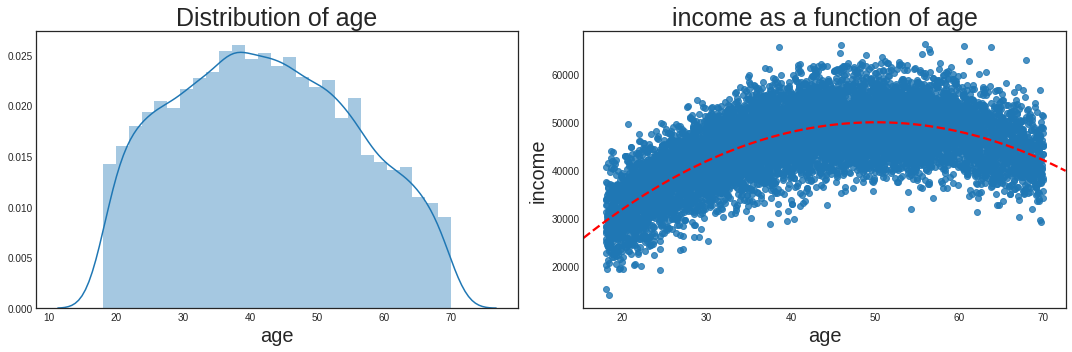

In [2]:
# Code that imports data and generate distribution plot as well as scatter plot along with f
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Styles for plots in the notebook
plt.rc('axes', titlesize=25)
plt.rc('axes', labelsize=20) 
plt.rc('legend', fontsize=20) 
plt.style.use('seaborn-white')
#sns.set_style("whitegrid")
%matplotlib inline

path_to_data = 'https://raw.githubusercontent.com/jeshan49/EEMP2019/master/content/part-5/part-5-1/income.csv'
df = pd.read_csv(path_to_data)

fig, axs = plt.subplots(1, 2, figsize=(15, 5), tight_layout=True)
sns.distplot(df['age'], ax=axs[0]).set_title('Distribution of age')
sns.regplot(x='age', y='income', data=df, ax=axs[1], order=2, ci=None, line_kws={'color':'red', 'ls':'--'}).set_title('income as a function of age')
#sns.despine()
plt.show();

- Usually, we do not know the whole population. Rather, we are working with a sample.
    - In this example, we will be working with a sample of 100 data points.
    - Our goal is to construct a model $\hat{f}(age)$ which makes "good" predictions about $income$
- Our sample is plotted below:

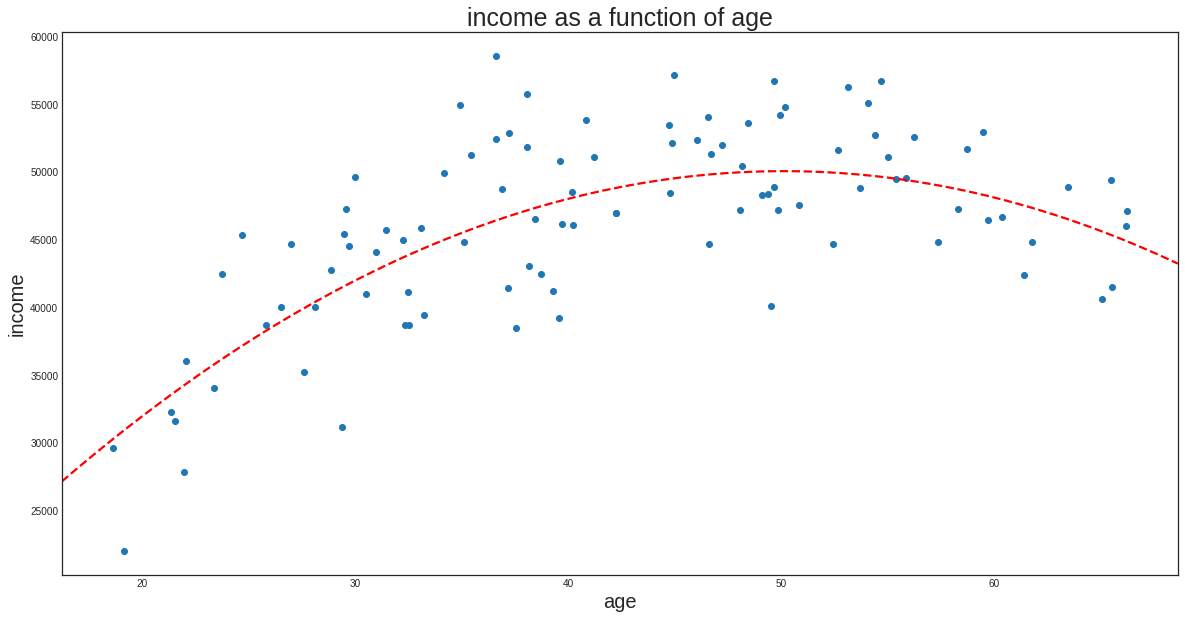

In [37]:
# Code that generates sample and plots it along with f
from sklearn.model_selection import train_test_split
X, _, y, _ = train_test_split(df['age'], df['income'], test_size=0.99, random_state=181)
plt.figure(figsize=(20,10))
plt.scatter(X, y)
sns.regplot(x='age', y='income', data=df, order=2, ci=None, scatter=None, line_kws={'color':'red', 'ls':'--'}).set_title('income as a function of age')
plt.show();

- In order to make predictions based on our sample, suppose we train two models:
    1. A simple linear regression: $$\hat{f}(age)=\hat{\beta}_0 + \hat{\beta}_1 age$$
    2. A 1NN regression
- Clearly, (1) is too inflexible and (2) is too flexible as illustrated in the following plots:

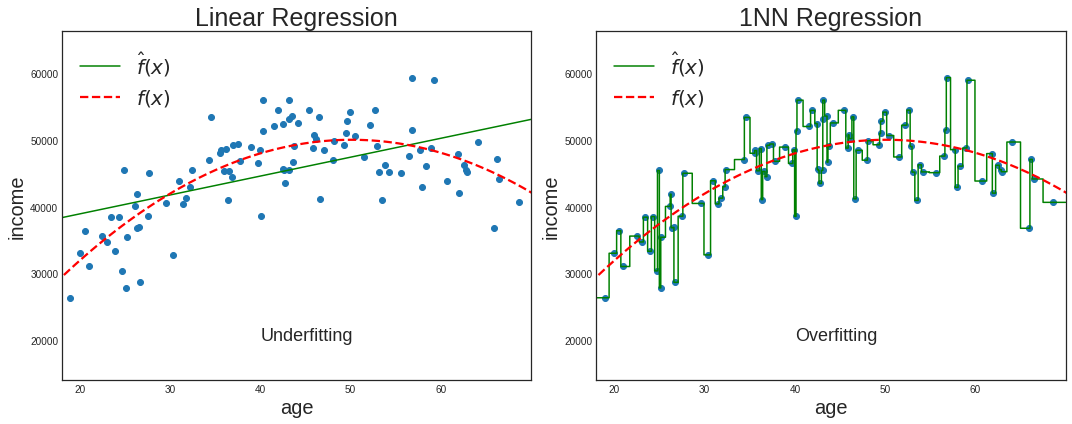

In [38]:
# Code that generates Linear and k nearest neighbor regression plots
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
reg = LinearRegression()
knn = KNeighborsRegressor(n_neighbors=1)
X, _, y, _ = train_test_split(df['age'], df['income'], test_size=0.99)
range_X = np.linspace(df['age'].min(), df['age'].max(), 1000)
X, y, range_X = X[:, np.newaxis], y[:, np.newaxis], \
                np.linspace(df['age'].min(), df['age'].max(), 1000)[:, np.newaxis]
y_hat_reg, y_hat_knn = reg.fit(X,y).predict(range_X), knn.fit(X,y).predict(range_X)
fig, axs = plt.subplots(1, 2, figsize=(15, 6), tight_layout=True)
title, fit = ['Linear Regression', '1NN Regression'], ['Underfitting', 'Overfitting']
axs[0].plot(range_X, y_hat_reg, c='g')
axs[1].step(range_X, y_hat_knn, c='g')
for i in range(len(axs)):
    axs[i].scatter(X,y)
    axs[i].set_title(title[i])
    axs[i].set_xlabel('X')
    axs[i].set_ylabel('y')
    sns.regplot(x='age', y='income', data=df, order=2, ci=None, scatter=None, ax=axs[i], line_kws={'color':'red', 'ls':'--'})
    axs[i].text(40, 20000, fit[i], fontsize=18)
    axs[i].legend(labels=['$\hat{f}(x)$', '$f(x)$'])
    axs[i].set_xlim(df['age'].min(), df['age'].max())
    axs[i].set_ylim(df['income'].min(), df['income'].max())
plt.show();

- We saw that a simple linear regression makes bad predictions because it underfits our training data:
    - It has high bias and low variance.
- We saw that 1NN regression makes bad predictions because it overfits our training data:
    - It has low bias and high variance.
    
- Thus, when dealing with predictions, we face a trade-off:
    - The Bias-Variance Trade-off
- More formally, given a realized point $(y_0,x_0)$, the expected squared error is given by:
$$E[(y_0 -\hat{f}(x_0))^2]= Var[\hat{f}(x_0)] + [f(x_0)-E[\hat{f}(x_0)]]^2 + \sigma_\epsilon$$
- The first term is the variance of our model at $x_0$, the second the squared 
bias at $x_0$, and the third is the irreducible error.

Let us investigate this trade-off further by varying the number of neighbors in our regression:

In [39]:
# Code that generates figures updatable by slider
from sklearn.metrics import mean_squared_error as mse
from ipywidgets import interactive

X, _, y, _ = train_test_split(df['age'], df['income'], test_size=0.99, random_state=181)
range_X = np.linspace(df['age'].min(), df['age'].max(), 1000)
X, y, range_X = X[:, np.newaxis], y[:, np.newaxis], \
                np.linspace(df['age'].min(), df['age'].max(), 1000)[:, np.newaxis]
mse_f_train = mse(y, 2000*X - 20*X**2)
mse_f_test = mse(df['income'], 2000*df['age'] - 20*df['age']**2)
rrange = np.arange(1, 101, 3)

mses_train = np.empty(34)
mses_train[:] = np.nan

mses_test = np.empty(34)
mses_test[:] = np.nan

mses_test_f = np.empty(34)
mses_test_f[:] = np.nan

def plot_with_slider(k=1):
    knn = KNeighborsRegressor(n_neighbors=k)
    y_hat_knn = knn.fit(X, y).predict(range_X)
    fig, axs = plt.subplots(1, 2, figsize=(15, 6), tight_layout=True)
    axs[0].scatter(X, y, c='b', label='Sample')
    axs[0].scatter(df['age'], df['income'], c='grey', alpha=0.1, label='Population')
    mse_train = mse(y,knn.fit(X, y).predict(X))
    mse_test = mse(df['income'][:, np.newaxis],knn.fit(X, y).predict(df['age'][:, np.newaxis]))
    mses_train[k//3] = mse_train
    mses_test[k//3] = mse_test
    mses_test_f[k//3] = mse_f_test
    sns.regplot(x='age', y='income', data=df, order=2, ci=None, scatter=None, ax=axs[0], line_kws={'color':'red', 'ls':'--'})
    axs[0].step(range_X, y_hat_knn, c='g', label='$\hat{f}$')
    axs[0].set_title('{}NN Regression'.format(k))
    axs[0].legend(loc='lower right')
    axs[1].plot(rrange,mses_train, label= '{0}$NN$ Training MSE: {1:,.2f}'.format(k,mse_train))
    axs[1].plot(rrange,mses_test, label='${0}NN$ Test MSE: {1:,.2f}'.format(k,mse_test))
    axs[1].plot(rrange,mses_test_f, c='black', ls='--', label='$f$ Test MSE: {0:,.2f}'.format(mse_f_test))
    axs[1].set_xticks(rrange)
    axs[1].set_ylim(0, 80000000)
    axs[1].legend(loc='upper center')
    axs[1].set_xlabel('# of neighbors')
    axs[1].set_ylabel('MSE')
    plt.show()
    

interactive_plot = interactive(plot_with_slider, k=(1, 100, 3))
interactive_plot

interactive(children=(IntSlider(value=1, description='k', min=1, step=3), Output()), _dom_classes=('widget-int…

### Introduction to Sci-kit Learn (Linear Regression)
- Simple and efficient tools for data mining and data analysis
- It can be installed via Anaconda Navigator or via conda
- To fit a linear regression model on the data $X$ and $y$, we first import the class:
```
from sklearn.linear_model import LinearRegression
```
- Then we can perform a regression via the following code:
```
reg = LinearRegression().fit(X,y)
```
- We can then access one of its attributes to get the coefficients:
```
reg.coef_
```

### Introduction to Sci-kit Learn (Creating Train and Test sets)
- Suppose we have a data frame `df` consisting of two columns, $X$ and $y$.
- the dataset has 50,000 observations, and we would like a random training set consisting of 25,000 and a test set consiting of 25,000 observation.
- To do this, we first import the Class:
```
from sklearn.model_selection import train_test_split
```
- Then we create our training and test data:
```
X_train, X_test, y_train, y_test = train_test_split(df['X'], df['y'], train_size=0.5, random_state=181)
```

<center><div class="header1">
  <p>Your task</p>
</div>

<div class="content1">
1. Use your knowledge about $f$ to create a linear regression model and fit it on a sample consisting of 100 observations. The data is located at https://raw.githubusercontent.com/jeshan49/EEMP2019/master/content/part-5/part-5-1/income.csv<br><br>
2. Check the coefficients of your model. Are they close to those given in $f$?<br><br>
3. Write a for loop that generates a new sample 100 times of 100 observations. Store the coefficients of the model in each loop.<br><br>
4. Calculate the mean of each coefficient. Are the means close to the coefficients given in $f$?<br><br>
5. Using Seaborn's distribution plot, plot the distribution of the coefficients.
</div></center>

In [4]:
# Solution 1
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

path_to_data = 'https://raw.githubusercontent.com/jeshan49/EEMP2019/master/content/part-5/part-5-1/income.csv'

df = pd.read_csv(path_to_data)

df['age_sq'] = df['age']**2

from sklearn.model_selection import train_test_split

X, _, y, _ = train_test_split(df[['age', 'age_sq']], df['income'], train_size=0.01)

from sklearn.linear_model import LinearRegression

reg = LinearRegression().fit(X,y)

reg.coef_

array([1679.14953771,  -15.54080241])

In [ ]:
# Solution 2

In [5]:
# Solution 3
beta_1 = []
beta_2 = []

for i in range(100):
    X, _, y, _ = train_test_split(df[['age', 'age_sq']], df['income'], train_size=0.01)
    reg = LinearRegression().fit(X,y)
    beta_1.append(reg.coef_[0])
    beta_2.append(reg.coef_[1])

In [6]:
# Solution 4
print(np.mean(beta_1))
print(np.mean(beta_2))

2012.0346414917833
-20.07375219051854


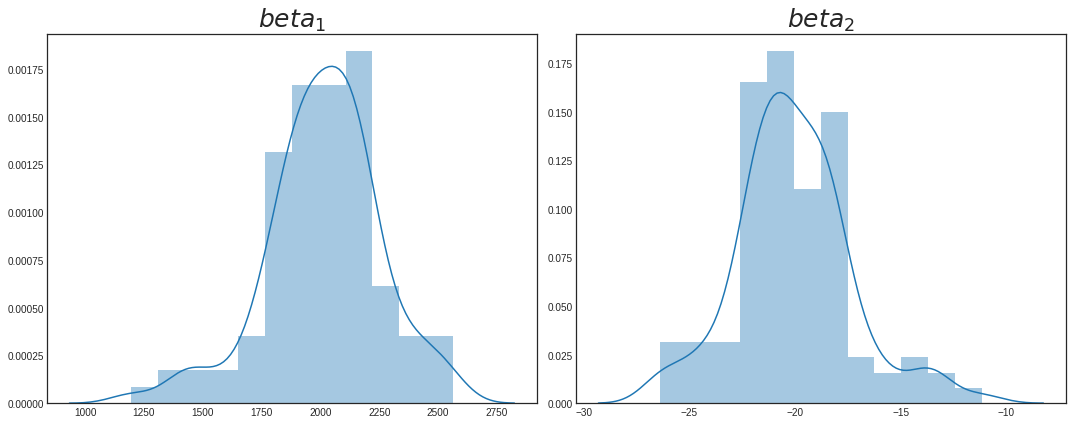

In [8]:
# Solution 5
fig, axs = plt.subplots(1, 2, figsize=(15, 6), tight_layout=True)
sns.distplot(beta_1, ax=axs[0]).set_title('$beta_1$')
sns.distplot(beta_2, ax=axs[1]).set_title('$beta_2$')
plt.show();

## Classification

### Bayes optimal classifier
Now $Y_i$ is qualitative.
- e.g. $Y_i \in \{spam, ham\}$

We wish to build a classifier $f(X_i)$ that assigns a class label to a future unlabeled observation $X_i$.
- Let $p_k(x_i) = Pr(Y_i=k|X_i=x_i), k=1,...,K$
- Suppose we knew this condiation probability.
- Then, the *Bayes optimal classifier* at $x_i$ is given by:
$f(x_i) = j$ if $p_j(x_i) = \max\{p_1(x_i),...,p_K(x_i)\}$
- This is the optimal classifier in the sense that it maximizes expected accuracy.

### Estimating $f$ - $KNN$ Classification
We might attemp to apply $KNN$ once again to approximate the conditional probabilities:
1. Estimate $p_k(x_i), i=1,...,K$: $$\hat{p}_k(x_i)=\frac{1}{K}\sum_{j\in N_k}I(x_j=k)$$
2. Classify $x_i$ to the class with the highest estimated probability: 
$\hat{f}(x_i)=k$ if $\hat{p}_k(x_i)=\max\{\hat{p}_1(x_i),...,\hat{p}_K(x_i)\}$

### Estimating $f$ - Linear Regression
If $K=2$, we can convert the classes into 0's and 1's and perform linear regression.
- Then we can treat the predictions as conditional probabilties.
- Finally, we classify $x_i$ to the class with the highest probability.

However, note that we might get probability estimates below zero and above one.

Furthermore, when $K>2$, the linear regression is no longer a good option becomes it imposes cardinality.

### Example
- Suppose for the same city "Python", our task is to predict whether or not a given individual defaults based on his/her income as well as credit card balance
- The population is given below to the left and the sample to the right.
- The dash line is the (unknown) optimal decision boundary

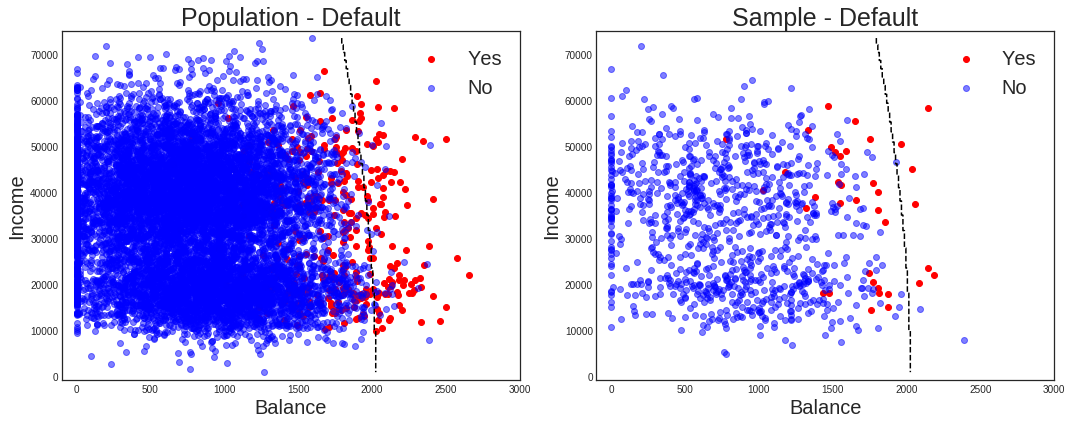

In [6]:
# code that generates population and sample plots with optimal decision boundary
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
path_to_data = 'https://raw.githubusercontent.com/jeshan49/EEMP2019/master/content/part-5/part-5-1/Default.csv'
df = pd.read_csv(path_to_data, index_col=0)
df['default'] = pd.get_dummies(df['default'], drop_first=True)
X, test_X, y, test_y = train_test_split(df[['balance', 'income']], df['default'], test_size=0.9, random_state=181)
qda = QuadraticDiscriminantAnalysis().fit(test_X,test_y)
h = 10  # step size in the mesh
x_min, x_max = test_X['balance'].min() - 100, test_X['balance'].max() + 1
y_min, y_max = test_X['income'].min() - 1, test_X['income'].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
YY = qda.predict(np.c_[xx.ravel(), yy.ravel()])
YY = YY.reshape(xx.shape)
fig, axs = plt.subplots(1, 2, figsize=(15, 6), tight_layout=True)
axs[0].scatter(df['balance'][df['default'] == 1], df['income'][df['default'] == 1], color='red', label = 'Yes')
axs[0].scatter(df['balance'][df['default'] == 0], df['income'][df['default'] == 0], color='blue', alpha=0.5, label = 'No')
axs[0].contour(xx, yy, YY, [0.5], colors='black', linestyles='dashed')
axs[0].set_title('Population - Default')
axs[1].scatter(X['balance'][y == 1],X['income'][y == 1], color='red', label = 'Yes')
axs[1].scatter(X['balance'][y == 0],X['income'][y == 0], color='blue', alpha=0.5, label = 'No')
axs[1].contour(xx, yy, YY, [0.5], colors='black', linestyles='dashed')
axs[1].set_title('Sample - Default')
for ax in axs:
    ax.legend()
    ax.set_ylabel('Income')
    ax.set_xlabel('Balance')
    ax.set_xlim(-100, 3000)
    ax.set_ylim(-1000, 75000)
plt.show()

- In order to make predictions based on our sample, suppose we train two models:
    1. A simple linear regression
    2. A 1NN regression
- Clearly, (1) is too inflexible and (2) is too flexible as illustrated in the following plots:

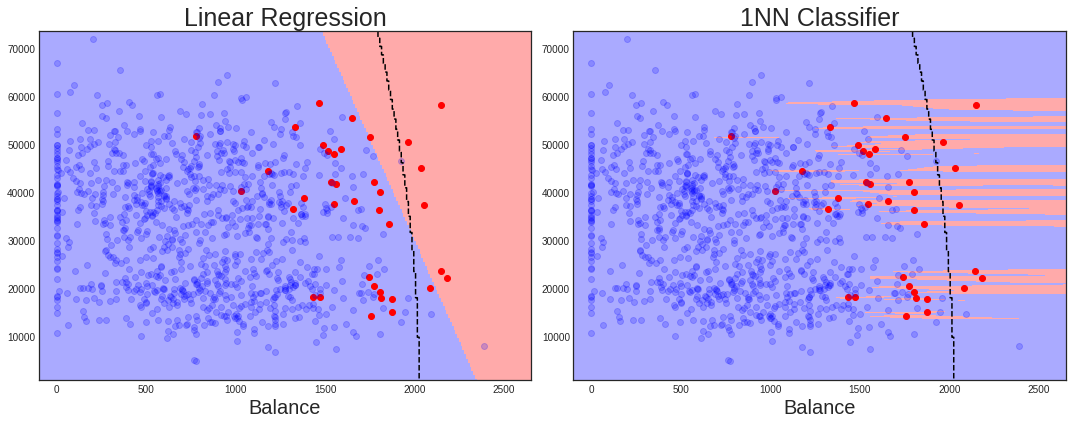

In [7]:
# Code that generates plots with Linear regression and KNN decision boundaries along with the optimal decision boundary
from matplotlib.colors import ListedColormap
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
lda = LinearDiscriminantAnalysis()
knn = KNeighborsClassifier(n_neighbors=1, n_jobs=-1)
lda.fit(X, y).predict(X)
knn.fit(X, y).predict(X)
cmap_light = ListedColormap(['#AAAAFF', '#FFAAAA'])
fig, axs = plt.subplots(1, 2, figsize=(15, 6), tight_layout=True)
clfs = [lda, knn]
clfs_names = ['Linear Regression', '1NN Classifier']
for i in range(len(clfs)):
    Z = clfs[i].predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    axs[i].pcolormesh(xx, yy, Z, cmap=(cmap_light))
    YY = qda.predict(np.c_[xx.ravel(), yy.ravel()])
    YY = YY.reshape(xx.shape)
    axs[i].set_title(clfs_names[i])
    axs[i].contour(xx, yy, YY, [0.5], colors='black', linestyles='dashed')
    axs[i].scatter(X['balance'][y == 1],X['income'][y == 1], color='red', label = 'Yes')
    axs[i].scatter(X['balance'][y == 0],X['income'][y == 0], color='blue', alpha=0.2, label = 'No')
    axs[i].set_xlabel('Balance')
    axs[i].set_xlabel('Balance')   

### Introduction to Sci-kit Learn (KNN Classification)
- To perform KNN classification, we first import the KNN class and then fit the model:
```
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=n)
clf.fit(X,y)
```
- To predict and evaluate the performance on our test set, we do the following:
```
y_pred = clf.predict(test_X)
y_score = clf.score(test_X, test_y)
```

<center><div class="header1">
  <p>Your task</p>
</div>

<div class="content1">
1. Import the data and modify the column 'default' such that it is a dummy variable. The data is located at https://raw.githubusercontent.com/jeshan49/EEMP2019/master/content/part-5/part-5-1/Default.csv<br><br>
2. Create a training sample consisting of 1,000 observations where $y$ is the column 'default' and X 'balance' and 'income'.
3. Fit a 1NN classifier to the training data. Evaluate its performance on both the training and test set.<br><br>
3. Write a for loop that performs an $i$NN regression, where i goes from 1 to 50. Store the score of the model on both the training and test set in each loop.<br><br>
4. Plot the training and test error rate with # of neighbors on the x-axis and error rate on the y-axis.
</div></center>

## Model Selection and Assesment

## Decision Tress

## Bootstrap Aggregating

## Boosting